# Day 7: Option Pricing
* Background knowledge
    * 期貨基本概念: http://piscesgt.blogspot.com/2008/05/blog-post_25.html
    * 選擇權基本概念: http://www.yuantafutures.com.tw/ytf/option/option_main.htm
* References:
    * Steven Shreve, [Stochastic Calculus for Finance II: Continuous-Time Models](https://www.amazon.com/Stochastic-Calculus-Finance-II-Continuous-Time/dp/144192311X), 2010.
        <img src = "https://images.springer.com/sgw/books/medium/9780387401010.jpg" width = 100>
    * Yuh-Dauh Lyuu, [Financial Engineering and Computation: Principles, Mathematics, Algorithms](https://www.amazon.com/Financial-Engineering-Computation-Principles-Mathematics-ebook/dp/B00INYGAYU), 2001.
        * https://www.csie.ntu.edu.tw/~lyuu/finance1.html
        <img src = "https://images-na.ssl-images-amazon.com/images/I/41D%2B9S%2BVYiL._SX330_BO1,204,203,200_.jpg" width = 100>
    * Yves Hilpisch, [Python for Finance: Analyze Big Financial Data](http://shop.oreilly.com/product/0636920032441.do), 2014.
        * https://github.com/yhilpisch/py4fi
        * https://www.datacamp.com/community/tutorials/finance-python-trading
        <img src = "https://covers.oreillystatic.com/images/0636920032441/cat.gif" width = 100>
    * Yves Hilpisch, [Derivatives Analytics with Python: Data Analysis, Models, Simulation, Calibration and Hedging](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119038016), 2015.
        * https://github.com/yhilpisch/dawp
        <img src = "https://images-na.ssl-images-amazon.com/images/I/51QSgE13snL._SX340_BO1,204,203,200_.jpg" width = 100>

## Selected Stochastic Processes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Geometric Brownian Motion (GBM)
* Black and Scholes (1973), and Merton (1973) assume that the return rates follows a random walk: $$\dfrac{dS_t}{S_t} = r dt + \sigma dW_{t, 1},$$ where $r$ is the risk-free interest rate, $\sigma$ is the volatility of the process, and $dW_t$ is a Wiener process.
    * Merton and Scholes received the 1997 Nobel Memorial Prize in Economic Sciences for their work, the committee citing their discovery of the risk neutral dynamic revision as a breakthrough that separates the option from the risk of the underlying security.

Text(0, 0.5, 'Price')

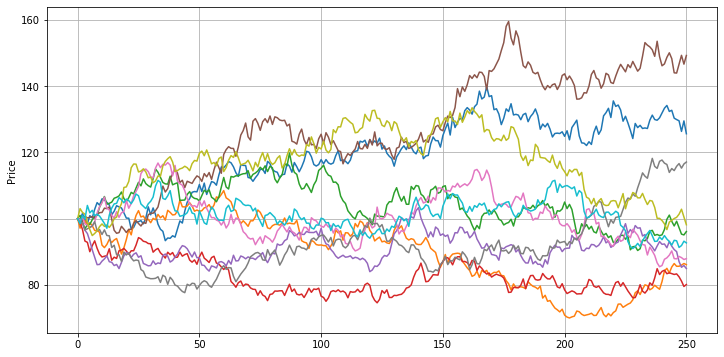

In [2]:
S0 = 100
r = 0.05
v = 0.25
T = 1
N = 250
dt = T / N

plt.figure(figsize = (12, 6))
for j in range(10):
    p = np.zeros([N + 1, 1])
    p[0] = S0
    for i in range(N):
        p[i + 1] = p[i] * (1 + r * dt + np.sqrt(dt) * v * np.random.randn(1))
    plt.plot(p)
    
plt.grid()
plt.ylabel("Price")

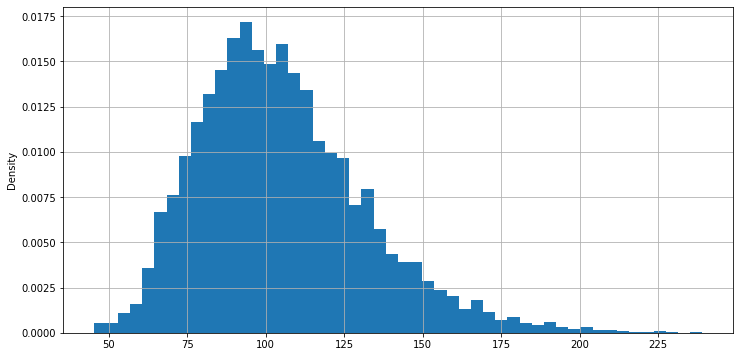

In [3]:
SS = S0 * np.exp((r - 0.5 * v ** 2) * T + v * np.sqrt(T) * np.random.randn(5000))

plt.figure(figsize = (12, 6))
plt.hist(SS, 50, density = True)
plt.grid()
plt.ylabel("Density")
plt.show()

### Mean-Reverting Process
* In finance, mean reversion is the assumption that a stock's price will tend to move to the average price over time.
    * For example, interest rate, commodity, VIX.
* Famous models are as follows:
    * `Ornstein-Uhlenbeck process` (1930)
        > The Ornstein–Uhlenbeck process can also be considered as the continuous-time analogue of the discrete-time AR(1) process.
    * `Vasicek model` (1977)
    * `Cox-Ingersoll-Ross (CIR) model` (1985)
        * The model is given by $$dr_t = \kappa (\theta - r_t) dt + \sigma \sqrt{r_t} dW_t,$$ where $\kappa$ is the mean-reverting rate, $\theta$ is the long-term average, $\sigma$ is the volatility of the variance.

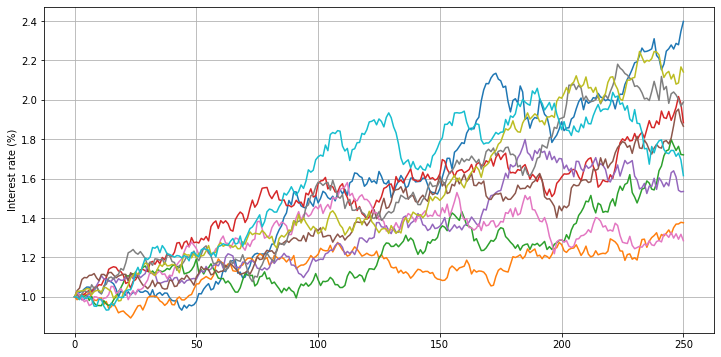

In [4]:
r0 = 0.01
theta = 0.05
k = 0.3
v = 0.3

plt.figure(figsize = (12, 6))
for j in range(10):
    r = np.zeros([N + 1, 1])
    r[0] = r0
    for i in range(N):
        r[i + 1] = r[i] + k * (theta - r[i]) * dt + np.sqrt(dt) * v * r[i] * np.random.randn(1)
    plt.plot(r * 100)
    
plt.grid()
plt.ylabel("Interest rate (%)")
plt.show()

### Stochastic Volatility Process
* As you can see, the diffusion term of CIR model is nondeterministic; CIR model is one of stochastic volaility models.
* Here we consider the `Heston model` (1993), which is given by $$\dfrac{dS_t}{S_t} = r dt + \sqrt{V_t} dW_{t, 1},$$ $$dV_t = \kappa (\theta - V_t) dt + \sigma \sqrt{V_t} dW_{t, 2},$$ where $\kappa$ is the mean-reverting rate, $\theta$ is the long-term average, $\sigma$ is the volatility of the variance, and $dW_{1, t}dW_{2, t} = \rho dt$.

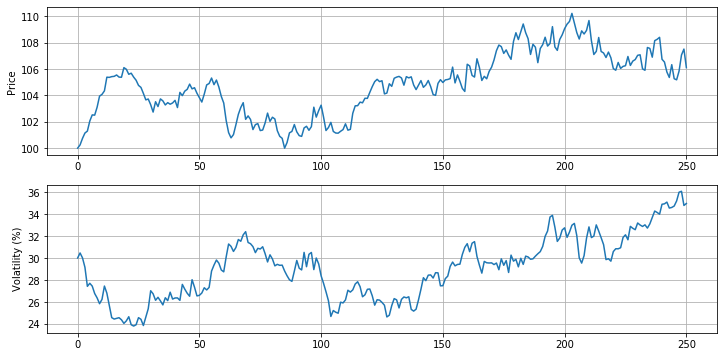

In [5]:
s0 = 100
r = 0.01

v0 = 0.09
theta = 0.04
k = 3
s = 0.3

rho = -0.7

plt.figure(figsize = (12, 6))
S = np.zeros([N + 1, 1])
S[0] = s0

v = np.zeros([N + 1, 1])
v[0] = v0

for i in range(N):
    S[i + 1] = S[i] * (1 + r * dt + np.sqrt(dt) * v[i] * np.random.randn(1))
    v[i + 1] = v[i] + k * (theta - v[i]) * dt + np.sqrt(dt) * s * np.sqrt(v[i]) * np.sqrt(1 - rho ** 2) * np.random.randn(1)
v = np.sqrt(v) * 100
    
plt.subplot(211)
plt.plot(S)
plt.grid()
plt.ylabel("Price")
plt.subplot(212)
plt.plot(v)
plt.grid()
plt.ylabel("Volatility (%)")
plt.show()

### Jump-Diffusion Process
* Merton's jump-diffusion process (1976)
    * See https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180516.pdf.

Text(0, 0.5, 'Price')

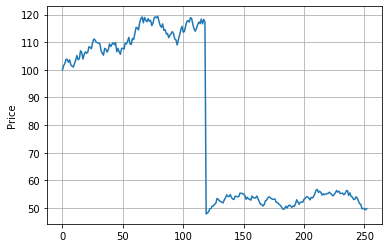

In [21]:
S0 = 100
r = 0.05
v = 0.2
intensity = 0.2
mu = -0.6
delta = 0.25
T = 1
N = 252

dt = T / N
rj = intensity * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros([N + 1, 1])

S[0] = S0
for i in range(N):
    S[i + 1] = S[i] * (np.exp((r - rj - 0.5 * v ** 2) * dt + v * np.sqrt(dt) * np.random.randn(1)) + (np.exp(mu + delta * np.random.randn(1)) - 1) * np.random.poisson(intensity * dt, 1))

plt.plot(S)
plt.grid()
plt.ylabel("Price")

## Pricing on European Options
* See [option basics](https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180321.pdf) starting from p.178.

### Call Prices of European Option by Monte Carlo Simulation

In [7]:
s0 = 100
X = 110
r = 0.05
v = 0.25
T = 1
M = 1000000

S = s0 * np.exp((r - 0.5 * v ** 2) * T + v * np.sqrt(T) * np.random.randn(1, M))
c = np.sum(S[S - X > 0] - X) / M * np.exp(-r * T)
p = np.sum(X - S[S - X < 0]) / M * np.exp(-r * T)
print(c)
print(p)

8.017624824096321
12.639637251758016


#### Black-Scholes Formula
* See [Black-Scholes formula](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model#Black%E2%80%93Scholes_formula).
* You can check your numbers with [選擇權理論價格計算](https://www.taifex.com.tw/cht/9/calOptPrice) by 期交所.

In [8]:
import scipy.stats

d1 = (np.log(s0 / X) + (r + 0.5 * v ** 2)) / np.sqrt(T) / v
d2 = d1 - np.sqrt(T) * v

cc = s0 * scipy.stats.norm.cdf(d1) - X * np.exp(-r * T) * scipy.stats.norm.cdf(d2)
print(cc)

8.026384693853352


### Call Prices of European Option by Binomial Option Pricing Model (BOPM)
* See the slides of [BOPM](https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180328.pdf).
* For demonstration, I use $n = 3$ but the resulting price converges to the closed-form formula as $n \rightarrow \infty$.

In [9]:
n = 3
dt = T / n

u = np.exp(v * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)

tree = np.zeros([n + 1, n + 1])
tree[0, 0] = s0
for period in range(1, n + 1):
    for level in range(period  + 1):
        factor = u ** (period - 2 * level)
        tree[level, period] = s0 * factor

print(tree)

[[100.         115.52740254 133.46580739 154.18958056]
 [  0.          86.5595502  100.         115.52740254]
 [  0.           0.          74.92555731  86.5595502 ]
 [  0.           0.           0.          64.85522539]]


In [10]:
for level in range(n + 1):
    payoff = tree[level, n] - X
    if payoff > 0:
        tree[level, n] = payoff
    else:
        tree[level, n] = 0
    
print(tree)

[[100.         115.52740254 133.46580739  44.18958056]
 [  0.          86.5595502  100.           5.52740254]
 [  0.           0.          74.92555731   0.        ]
 [  0.           0.           0.           0.        ]]


In [11]:
R = np.exp(r * dt)

for period in range(n - 1, -1, -1):
    for level in range(period + 1):
        tree[level, period] = (p * tree[level, period + 1] + (1 - p) * tree[level + 1, period + 1]) / R

print(tree)

[[ 8.03311261 14.31391809 25.28394747 44.18958056]
 [ 0.          1.45672576  2.83758871  5.52740254]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [12]:
print("c = {}".format(tree[0, 0]))

c = 8.033112613828052


#### Exercise: Put Price?
* Simply change the payoff function to $\max(X - S_t, 0)$.

#### Exercise: American Option Price?
* You can exercise anytime during the option lifespan.